In [251]:
# Installing ydata-profiling
!pip install --upgrade numba ydata-profiling visions

In [252]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from IPython.display import display

In [253]:
# Loading cleaned dataset
df = pd.read_pickle('cleaned_arrears_data.pkl')

In [254]:
# Displaying df & ensuring the data is clean before proceeding
display(df.head())
display(df.info())

,Customer_ID,Contract_Term,Cost_Amount_GBP,Regulatory_Compliance,Customer_Category,Exposure_Amount_GBP,Contract_Status,Assistance_Flag,Risk_Flag,Payment_Status,Forbearance_Amount_GBP,Payment_Interval,Late_Payment_Fees_GBP,Total_Arrears_GBP
0,IRD028644,52,36490.82,No,Corporation,23280.86,Expired,No,No,Current,1479.19,Annually,915.66,1517.72
1,JQW659845,47,14841.72,Yes,Individual,13655.73,Closed,Yes,No,Current,3297.25,Annually,885.44,232.85
2,PGA833046,35,18721.10,Yes,LLC,9959.53,Active,No,Yes,Current,810.77,Annually,497.17,7139.78
3,TOK138101,41,25319.07,No,Individual,28506.77,Closed,No,No,Recovered,2556.06,Annually,941.63,15546.67
4,RFS817524,45,10644.33,No,LLC,12381.26,Expired,No,No,Delinquent,3446.34,Monthly,907.70,10218.63


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Customer_ID             100000 non-null  object  
 1   Contract_Term           100000 non-null  int64   
 2   Cost_Amount_GBP         100000 non-null  float64 
 3   Regulatory_Compliance   100000 non-null  category
 4   Customer_Category       100000 non-null  category
 5   Exposure_Amount_GBP     100000 non-null  float64 
 6   Contract_Status         100000 non-null  category
 7   Assistance_Flag         100000 non-null  category
 8   Risk_Flag               100000 non-null  category
 9   Payment_Status          100000 non-null  category
 10  Forbearance_Amount_GBP  100000 non-null  float64 
 11  Payment_Interval        100000 non-null  category
 12  Late_Payment_Fees_GBP   100000 non-null  float64 
 13  Total_Arrears_GBP       100000 non-null  float64 
dtypes: ca

None

In [255]:
# Summary statistics for numerical columns
print("Summary statistics for df_1:")
df.describe()

Summary statistics for df_1:


,Contract_Term,Cost_Amount_GBP,Exposure_Amount_GBP,Forbearance_Amount_GBP,Late_Payment_Fees_GBP,Total_Arrears_GBP
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,36.070060,27513.510857,15253.076136,2506.416101,498.579189,9981.074462
std,14.137417,12979.312172,8505.720938,1444.324277,288.794702,5768.236409
min,12.000000,5000.130000,500.420000,0.000000,0.010000,0.090000
25%,24.000000,16321.765000,7894.602500,1256.587500,249.030000,4967.567500
50%,36.000000,27527.530000,15254.140000,2508.575000,498.025000,9970.910000
75%,48.000000,38706.805000,22622.255000,3765.322500,748.110000,14991.747500
max,60.000000,49999.480000,29999.900000,4999.910000,999.990000,19999.570000


In [256]:
# Descriptive statistics for categorical variables
print("Descriptive statistics for df_1:")
df.describe(include=['category'])

Descriptive statistics for df_1:


,Regulatory_Compliance,Customer_Category,Contract_Status,Assistance_Flag,Risk_Flag,Payment_Status,Payment_Interval
count,100000,100000,100000,100000,100000,100000,100000
unique,2,5,3,2,2,3,3
top,No,Small Business,Active,No,No,Current,Annually
freq,50290,20143,33577,50065,50132,33556,33418


In [257]:
# Exploratory data analysis, EDA
eda = ProfileReport(df, title='EDA REPORT')
eda

Output hidden; open in https://colab.research.google.com to view.

<Figure size 900x700 with 0 Axes>

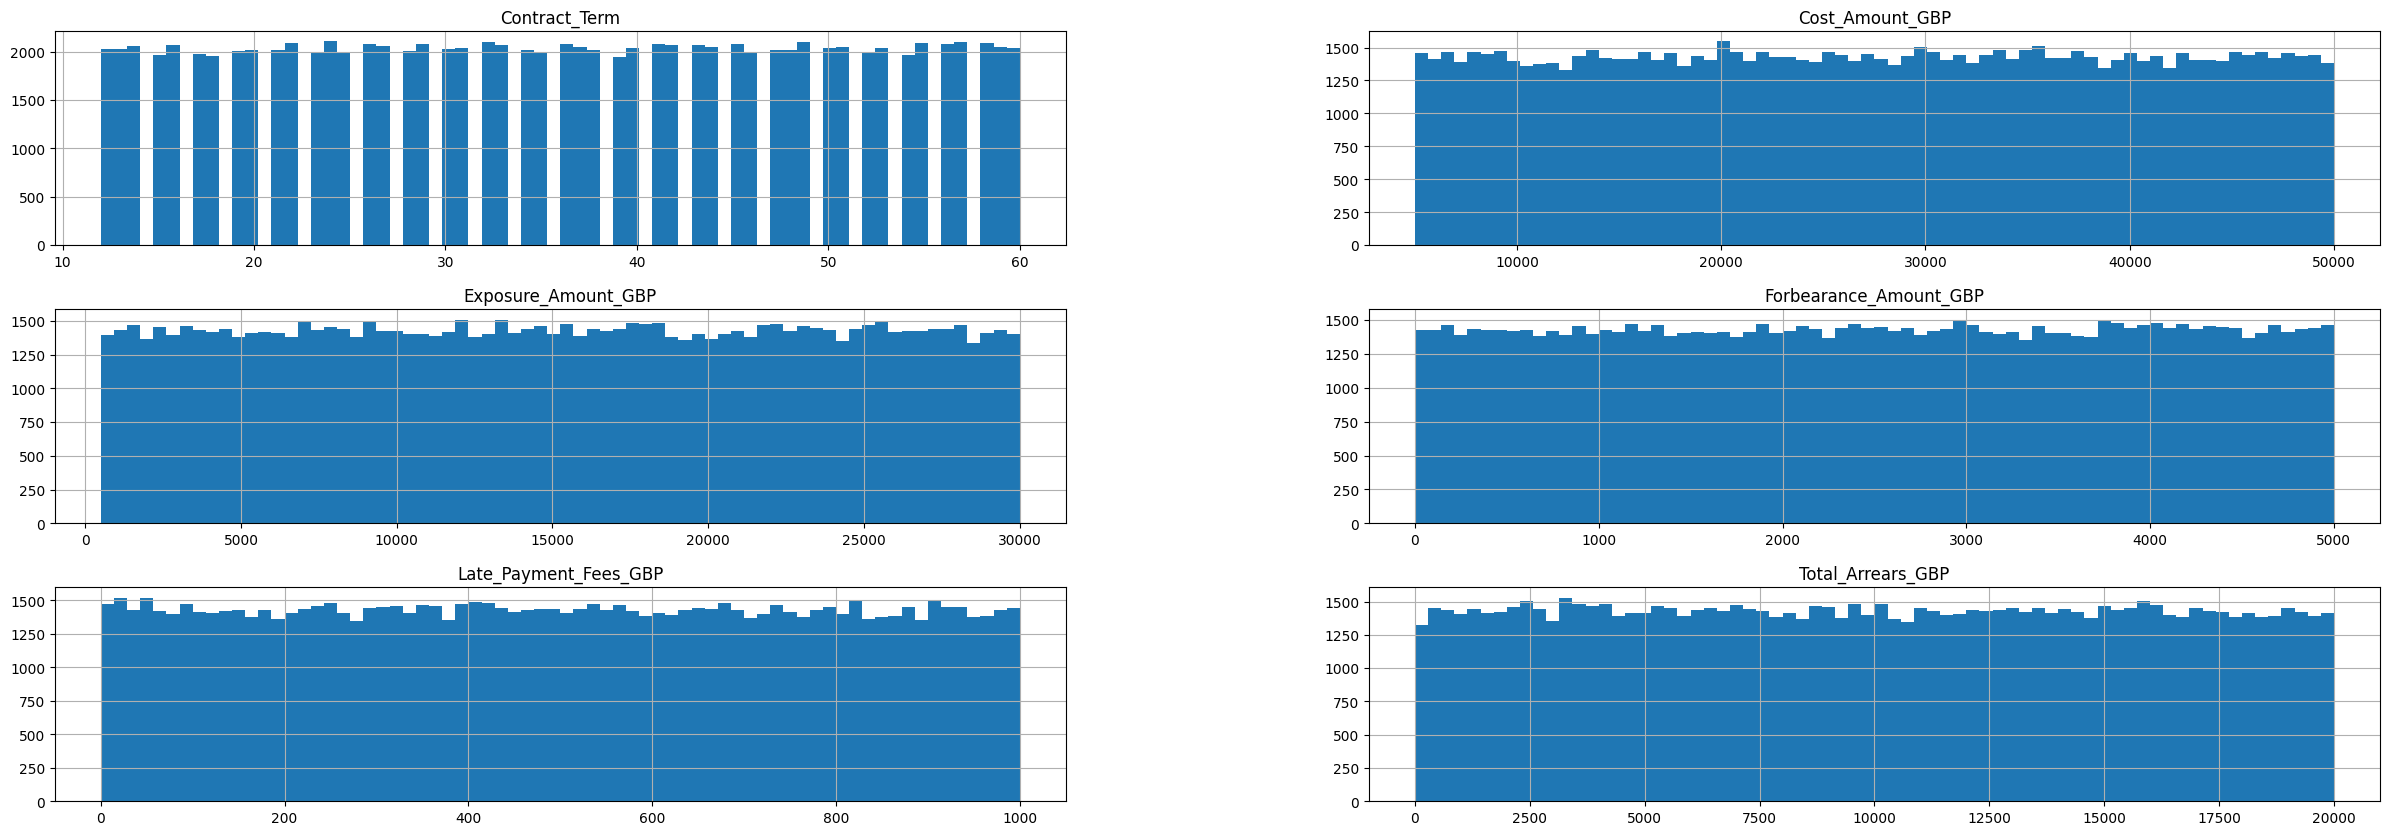

In [258]:
# Showing distribution of numerical features
plt.figure(figsize=(9, 7))

df.hist(bins=70, figsize=(30, 10))
plt.show()

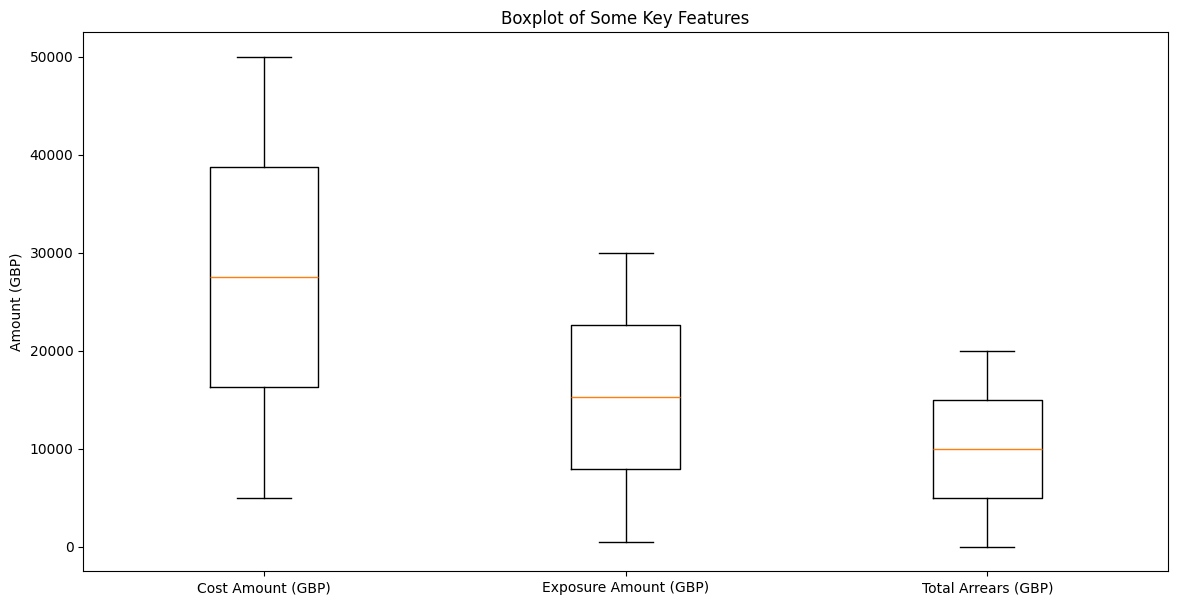

In [259]:
# Visualizing boxplots for outliers & for spread of data
plt.figure(figsize=(14, 7))

plt.boxplot(df[
    ['Cost_Amount_GBP', 'Exposure_Amount_GBP', 'Total_Arrears_GBP']], labels=[
        'Cost Amount (GBP)', 'Exposure Amount (GBP)', 'Total Arrears (GBP)'])
plt.title('Boxplot of Some Key Features')
plt.ylabel('Amount (GBP)')
plt.show()

In [260]:
# Dropping columns not useful for modelling
droppers = ['Customer_ID', 'Regulatory_Compliance', 'Contract_Status',
            'Risk_Flag', 'Payment_Status', 'Forbearance_Amount_GBP',
            'Late_Payment_Fees_GBP']
df.drop(droppers, axis = 1 , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Contract_Term        100000 non-null  int64   
 1   Cost_Amount_GBP      100000 non-null  float64 
 2   Customer_Category    100000 non-null  category
 3   Exposure_Amount_GBP  100000 non-null  float64 
 4   Assistance_Flag      100000 non-null  category
 5   Payment_Interval     100000 non-null  category
 6   Total_Arrears_GBP    100000 non-null  float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 3.3 MB


In [261]:
# Feature engineering
# Debt-to-Exposure Ratio: Calculate the ratio of Total Arrears to Exposure
# Amount. This will help understand how much arrears a customer has relative to
# their overall exposure.
# Arrears as Percentage of Asset Cost: You can create a feature that calculates
# arrears as a percentage of the asset's original cost. This will help models
# understand how significant the arrears are.

df['Debt_to_Exposure_Ratio'] = df[
    'Total_Arrears_GBP'] / df['Exposure_Amount_GBP']
df['Arrears_to_Asset_Cost'] = (df[
    'Total_Arrears_GBP'] / df['Cost_Amount_GBP']) * 100

# Defining threshold for 'In_Arrears_Flag'
threshold_arrears = 7000  # adjustable

# Adding column to indicate if the customer is in arrears based on Total Arrears
# df['In_Arrears_Flag'] = df['Total_Arrears_GBP'].apply(lambda x: 1 if x > 0 else 0)
df['In_Arrears_Flag'] = df['Total_Arrears_GBP'].apply(lambda x: 1 if x > threshold_arrears else 0)


df.head()

,Contract_Term,Cost_Amount_GBP,Customer_Category,Exposure_Amount_GBP,Assistance_Flag,Payment_Interval,Total_Arrears_GBP,Debt_to_Exposure_Ratio,Arrears_to_Asset_Cost,In_Arrears_Flag
0,52,36490.82,Corporation,23280.86,No,Annually,1517.72,0.065192,4.159183,0
1,47,14841.72,Individual,13655.73,Yes,Annually,232.85,0.017051,1.568888,0
2,35,18721.10,LLC,9959.53,No,Annually,7139.78,0.716879,38.137609,1
3,41,25319.07,Individual,28506.77,No,Annually,15546.67,0.545368,61.403006,1
4,45,10644.33,LLC,12381.26,No,Monthly,10218.63,0.825330,96.000688,1


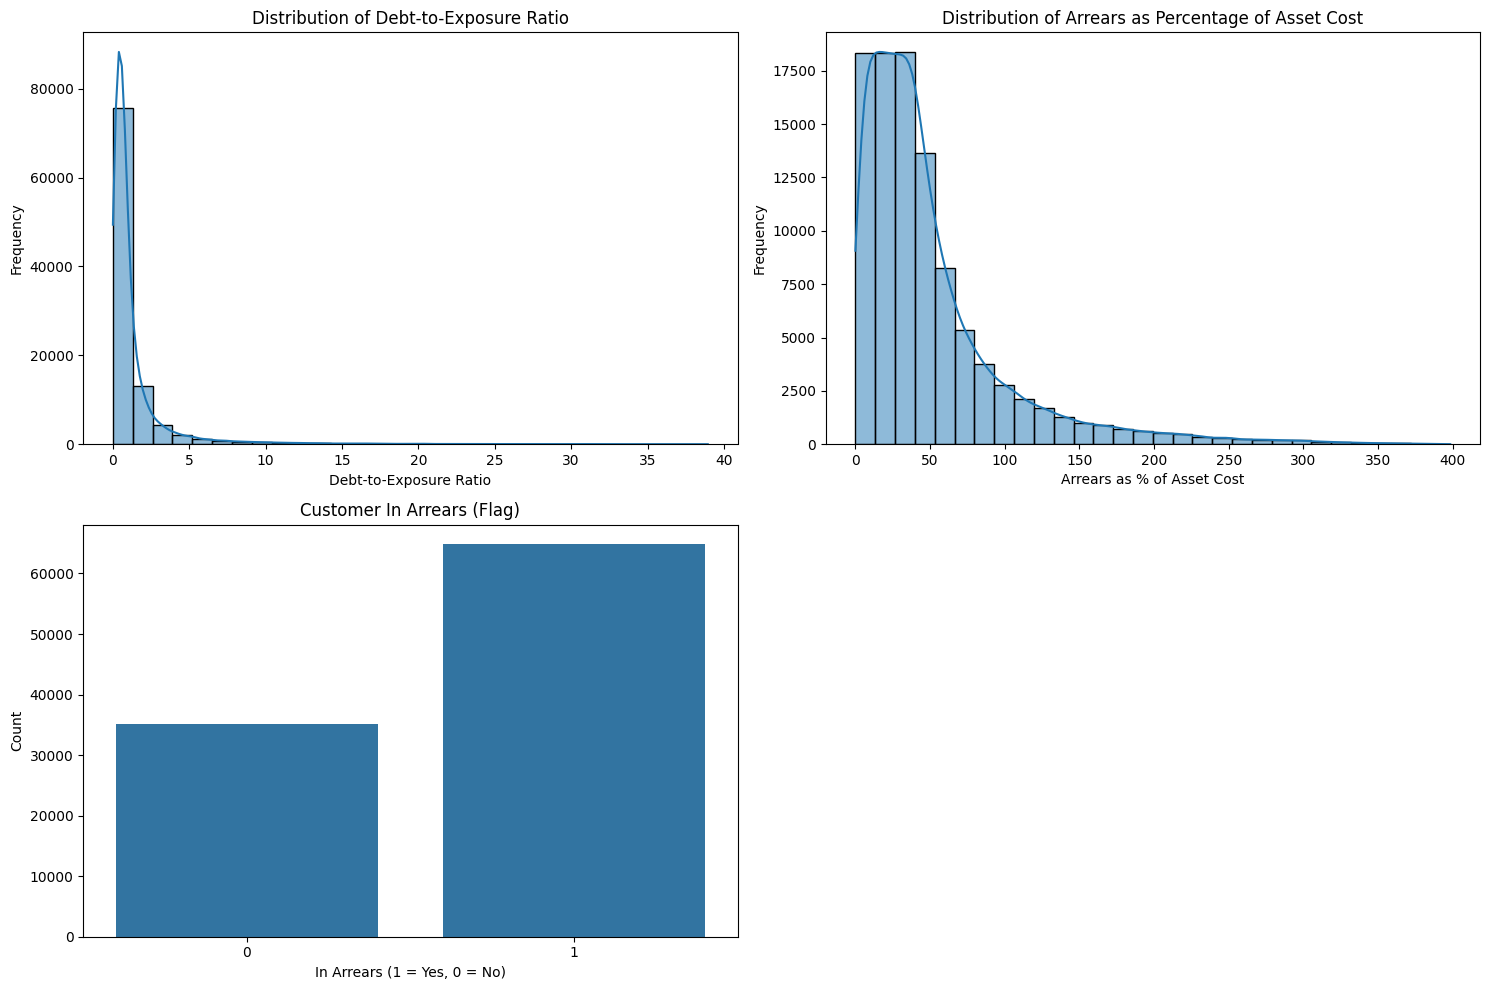

In [262]:
# Visualizing new features
plt.figure(figsize=(15, 10))

# Histogram for Debt_to_Exposure_Ratio
plt.subplot(2, 2, 1)
sns.histplot(df['Debt_to_Exposure_Ratio'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Exposure Ratio')
plt.xlabel('Debt-to-Exposure Ratio')
plt.ylabel('Frequency')

# Histogram for Arrears_to_Asset_Cost
plt.subplot(2, 2, 2)
sns.histplot(df['Arrears_to_Asset_Cost'], bins=30, kde=True)
plt.title('Distribution of Arrears as Percentage of Asset Cost')
plt.xlabel('Arrears as % of Asset Cost')
plt.ylabel('Frequency')

# Bar plot for In_Arrears_Flag
plt.subplot(2, 2, 3)
sns.countplot(x='In_Arrears_Flag', data=df)
plt.title('Customer In Arrears (Flag)')
plt.xlabel('In Arrears (1 = Yes, 0 = No)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [263]:
# Visualizing outliers for old and new features
col = ['Cost_Amount_GBP', 'Total_Arrears_GBP']
for i in col:
    fig = px.box(df , y = i , title  = f'BOX PLOT FOR {i}')
    fig.show()

hol = ['Debt_to_Exposure_Ratio' ,'Arrears_to_Asset_Cost']
for i in hol:
    fig = px.box(df , y=i)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [264]:
# Applying transformations to positively skewed features
df['Log_Debt_to_Exposure_Ratio'] = np.log1p(df['Debt_to_Exposure_Ratio'])
df['Log_Arrears_to_Asset_Cost'] = np.log1p(df['Arrears_to_Asset_Cost'])

In [265]:
# Addressing class imbalance in In_Arrears_Flag
X = df[['Log_Debt_to_Exposure_Ratio', 'Log_Arrears_to_Asset_Cost']]
# Using transformed features

y = df['In_Arrears_Flag']

# Check the lengths of the data
print("Length of X before SMOTE:", len(X))
print("Length of y before SMOTE:", len(y))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Splitting the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Printing shapes of training and testing sets for verification
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


# Check the lengths of the resampled data
print("Length of X_res after SMOTE:", len(X_res))
print("Length of y_res after SMOTE:", len(y_res))

Length of X before SMOTE: 100000
Length of y before SMOTE: 100000
Training set shape: (103678, 2)
Testing set shape: (25920, 2)
Length of X_res after SMOTE: 129598
Length of y_res after SMOTE: 129598


In [266]:
# Resampled target y_res
y_res_df = pd.DataFrame({'In_Arrears_Flag': y_res})

display(df.head())
display(y_res_df.head())

,Contract_Term,Cost_Amount_GBP,Customer_Category,Exposure_Amount_GBP,Assistance_Flag,Payment_Interval,Total_Arrears_GBP,Debt_to_Exposure_Ratio,Arrears_to_Asset_Cost,In_Arrears_Flag,Log_Debt_to_Exposure_Ratio,Log_Arrears_to_Asset_Cost
0,52,36490.82,Corporation,23280.86,No,Annually,1517.72,0.065192,4.159183,0,0.063155,1.640778
1,47,14841.72,Individual,13655.73,Yes,Annually,232.85,0.017051,1.568888,0,0.016908,0.943473
2,35,18721.10,LLC,9959.53,No,Annually,7139.78,0.716879,38.137609,1,0.540508,3.667084
3,41,25319.07,Individual,28506.77,No,Annually,15546.67,0.545368,61.403006,1,0.435262,4.133613
4,45,10644.33,LLC,12381.26,No,Monthly,10218.63,0.825330,96.000688,1,0.601761,4.574718


,In_Arrears_Flag
0,0
1,0
2,1
3,1
4,1


In [267]:
# Re-visualizing new features post-transformations
plt.figure(figsize=(15, 10))

# Histogram for Debt_to_Exposure_Ratio
plt.subplot(2, 2, 1)
sns.histplot(df['Log_Debt_to_Exposure_Ratio'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Exposure Ratio - transformed')
plt.xlabel('Debt-to-Exposure Ratio')
plt.ylabel('Frequency')

# Histogram for Arrears_to_Asset_Cost
plt.subplot(2, 2, 2)
sns.histplot(df['Log_Arrears_to_Asset_Cost'], bins=30, kde=True)
plt.title('Distribution of Arrears as Percentage of Asset Cost - transformed')
plt.xlabel('Arrears as % of Asset Cost')
plt.ylabel('Frequency')

# Bar plot for In_Arrears_Flag
plt.subplot(2, 2, 3)
sns.countplot(x='In_Arrears_Flag', data=y_res_df)
plt.title('Customer In Arrears (Flag) - transformed')
plt.xlabel('In Arrears (1 = Yes, 0 = No)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

pol = ['Log_Debt_to_Exposure_Ratio' ,'Log_Arrears_to_Asset_Cost']
for i in pol:
    fig = px.box(df , y=i)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [268]:
# Dropping columns that underwent transformation & displaying df info
df.drop(['Debt_to_Exposure_Ratio', 'Arrears_to_Asset_Cost'], axis = 1 , inplace=True)

In [269]:
# Applying label encoding to binary column

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Binary column
binary_column = ['Assistance_Flag']

# Applying LabelEncoder to binary column
for col in binary_column:
    df[col] = label_encoder.fit_transform(df[col])

In [270]:
# One-hot encoding categorical columns
categorical_columns = ['Customer_Category', 'Payment_Interval']

# Applying one-hot encoding
df = pd.get_dummies(
    df, columns=categorical_columns, drop_first=True).astype(float)
    # drop_first=True avoids multicollinearity

In [271]:
# Displaying and checking df
df

,Contract_Term,Cost_Amount_GBP,Exposure_Amount_GBP,Assistance_Flag,Total_Arrears_GBP,In_Arrears_Flag,Log_Debt_to_Exposure_Ratio,Log_Arrears_to_Asset_Cost,Customer_Category_Individual,Customer_Category_LLC,Customer_Category_Small Business,Customer_Category_Sole Proprietorship,Payment_Interval_Monthly,Payment_Interval_Quarterly
0,52.0,36490.82,23280.86,0.0,1517.72,0.0,0.063155,1.640778,0.0,0.0,0.0,0.0,0.0,0.0
1,47.0,14841.72,13655.73,1.0,232.85,0.0,0.016908,0.943473,1.0,0.0,0.0,0.0,0.0,0.0
2,35.0,18721.10,9959.53,0.0,7139.78,1.0,0.540508,3.667084,0.0,1.0,0.0,0.0,0.0,0.0
3,41.0,25319.07,28506.77,0.0,15546.67,1.0,0.435262,4.133613,1.0,0.0,0.0,0.0,0.0,0.0
4,45.0,10644.33,12381.26,0.0,10218.63,1.0,0.601761,4.574718,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,40.0,23108.24,16749.92,1.0,315.52,0.0,0.018662,0.860947,1.0,0.0,0.0,0.0,0.0,0.0
99996,46.0,15074.43,6613.02,1.0,12125.43,1.0,1.041537,4.399831,0.0,0.0,0.0,0.0,0.0,1.0
99997,42.0,27906.26,9002.97,1.0,1312.93,0.0,0.136132,1.741306,0.0,0.0,0.0,0.0,1.0,0.0
99998,43.0,33540.96,2440.10,0.0,6945.45,0.0,1.347132,3.077652,1.0,0.0,0.0,0.0,0.0,1.0


In [272]:
# Displaying df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Contract_Term                          100000 non-null  float64
 1   Cost_Amount_GBP                        100000 non-null  float64
 2   Exposure_Amount_GBP                    100000 non-null  float64
 3   Assistance_Flag                        100000 non-null  float64
 4   Total_Arrears_GBP                      100000 non-null  float64
 5   In_Arrears_Flag                        100000 non-null  float64
 6   Log_Debt_to_Exposure_Ratio             100000 non-null  float64
 7   Log_Arrears_to_Asset_Cost              100000 non-null  float64
 8   Customer_Category_Individual           100000 non-null  float64
 9   Customer_Category_LLC                  100000 non-null  float64
 10  Customer_Category_Small Business       100000 non-null  f

In [273]:
# Scaling numerical features using MinMax Scaler

# Numerical columns to scale
numerical_columns = ['Contract_Term', 'Cost_Amount_GBP', 'Exposure_Amount_GBP',
                     'Total_Arrears_GBP', 'Log_Debt_to_Exposure_Ratio',
                     'Log_Arrears_to_Asset_Cost']

# Initializing scaler
scaler = MinMaxScaler()

# Fitting and transforming numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Checking scaled data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Contract_Term                          100000 non-null  float64
 1   Cost_Amount_GBP                        100000 non-null  float64
 2   Exposure_Amount_GBP                    100000 non-null  float64
 3   Assistance_Flag                        100000 non-null  float64
 4   Total_Arrears_GBP                      100000 non-null  float64
 5   In_Arrears_Flag                        100000 non-null  float64
 6   Log_Debt_to_Exposure_Ratio             100000 non-null  float64
 7   Log_Arrears_to_Asset_Cost              100000 non-null  float64
 8   Customer_Category_Individual           100000 non-null  float64
 9   Customer_Category_LLC                  100000 non-null  float64
 10  Customer_Category_Small Business       100000 non-null  f

In [274]:
# Displaying sum of null values as part of final checks
df.isnull().sum()

,0
Contract_Term,0
Cost_Amount_GBP,0
Exposure_Amount_GBP,0
Assistance_Flag,0
Total_Arrears_GBP,0
In_Arrears_Flag,0
Log_Debt_to_Exposure_Ratio,0
Log_Arrears_to_Asset_Cost,0
Customer_Category_Individual,0
Customer_Category_LLC,0


In [275]:
# Displaying sum of duplicated values as part of final checks
df.duplicated().sum()

0

In [276]:
# Defining target and features
X = X_res  # The resampled features from SMOTE
y = y_res  # The resampled target from y_res_df

In [277]:
print("Length of X:", len(X))
print("Length of y:", len(y))

Length of X: 129598
Length of y: 129598


In [278]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shapes of training and testing sets for verification
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (103678, 2)
Testing set shape: (25920, 2)


In [279]:
# Saving splits for models
with open('train_test_splits.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)